**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.

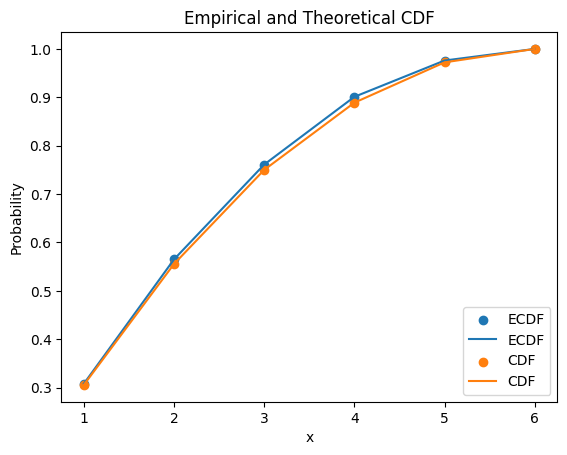

In [3]:
# 1. 
faces = np.array([1, 2, 3, 4, 5, 6])

# computing by hand and simulate using the law of large numbers

# Explicit calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

# Bootstrap simulation:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

Expected value:  3.536


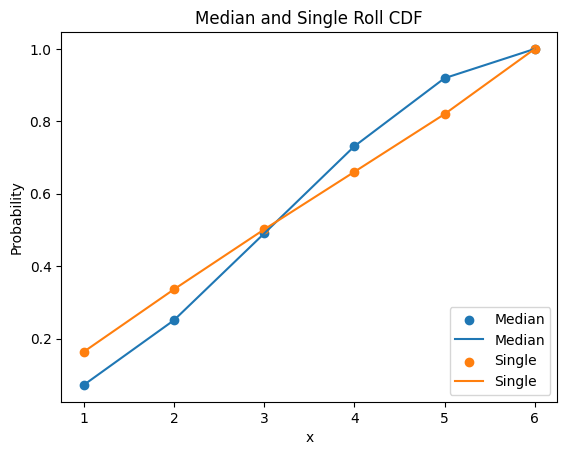

In [4]:
## 2.
# Define the possible faces of a die (1-6)
faces = np.array([1,2,3,4,5,6]) 

# Number of dice rolls
N = 5000

# simulate rolling three dice N times
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)

# compute median roll for each trial and store as integers
med_roll = [int(np.median([d1[i], d2[i], d3[i]])) for i in range(N)]  

# compute expected val of median rolls
expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

# initialize arroays for ECDF - empirical cumulative distr function
ecdf = np.zeros(6)
single = np.zeros(6)

# Calculate ECDF for median and single die rolls 
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i]) # prob median roll is <= each face value 
    single[i] = (1/N)*np.sum( d1 <= faces[i]) # prob single roll is <= each face value 

# recompute expected val (redundant line, could be removed)
expected_value = np.sum(med_roll)/N

# # Comparison of ECDF for median rolls and single rolls 
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

                  0
count  50000.000000
mean       4.196520
std        3.246652
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       37.000000


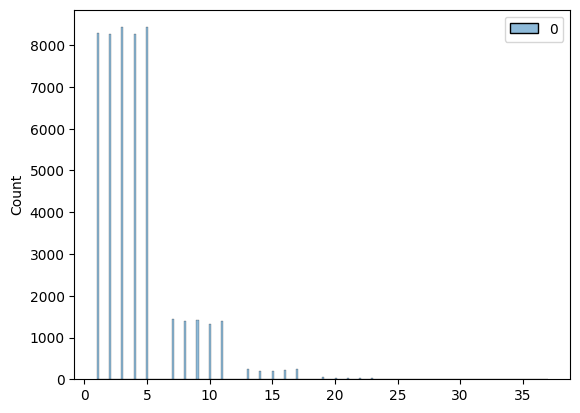

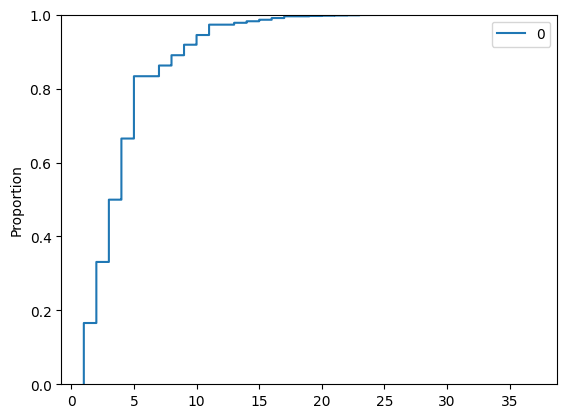

In [5]:
## 3. 

N = 50000 # number of simulations 
results = []

# simulate game N times 
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

# convert results list into a df
results = pd.DataFrame(results)


print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

In [6]:
# Load in dataset and preview data 
df = pd.read_csv('./data/heart_hw.csv')
df.tail()

,Unnamed: 0,age,transplant,y
98,99,30,control,1
99,100,48,treatment,1
100,101,40,treatment,1
101,102,48,treatment,1
102,103,33,treatment,1


In [7]:
## 1. create treatment indicator and intercept columns 

df['treat'] = 0 # Initialize treatment indicator (0 = no transplant, 1 = transplant)
df['intercept'] = 1 # Add intercept column for regression
df.loc[ df['transplant']=='treatment','treat']=1 # Set treat = 1 for treatment group

# Display a contingency table of transplant status vs survival outcome
print( pd.crosstab( df['transplant'], df['y']), '\n')

# Part 1: Proportion calculations
# a. proportion of survival in the control group
print('Proportion survived, control: ', 4/34, '\n')

# b. average treatment effect (difference in survival proportions between treatment and control groups)
print('Average treatment effect: ', 24/(24+45)-4/(30+4))

y            0   1
transplant        
control     30   4
treatment   45  24 

Proportion survived, control:  0.11764705882352941 

Average treatment effect:  0.23017902813299232


In part 1, I calculated the proportion of people who survived in the control group (those who did not receive a transplant). This was done by dividing the number of survivors in the control group (4) by the total number of people in the control group (34), getting a survival proportion of approximately 0.1176 (11.76%).

Next, I calculated the average treatment effect by determining the difference in survival proportions between the treatment group and the control group. The survival proportion in the treatment group was calculated as 24 survivors out of 69 total individuals (34.78%). Subtracting the survival proportion in the control group from the treatment group gave an average treatment effect of approximately 0.2302 (23.02%). This indicates that receiving a transplant improves the likelihood of survival by about 23%.

In [8]:
## 2. Regression of survival on treatment

from sklearn.linear_model import LinearRegression

y = df['y'] # Outcome variable (survival)
X = df.loc[:,['intercept', 'treat']] # Design matrix with intercept and treatment

# Fit a linear regression model without an additional intercept
reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)

Regression Coefficients:  [0.11764706 0.23017903]


In part 2, I regressed the survival outcome (y) on the treatment variable (transplant) by using a linear model. The intercept of the regression directly corresponds to the survival probability in the control group (approximately 0.1176), aligning with the proportion calculated in part 1a. 

The coefficient for the treatment variable reflects the difference in survival probabilities between the treatment and control groups, which was approximately 0.2302. This confirms that the regression coefficients correspond directly to the survival proportions and the average treatment effect calculated in part 1.

In [9]:
# 3: Add age as a predictor

from sklearn.linear_model import LinearRegression

y = df['y'] # Outcome variable
X = df.loc[:,['intercept', 'treat', 'age']] # Add age as a covariate

# Fit the linear regression model
reg = LinearRegression(fit_intercept=False).fit(X,y)


print('Regression Coefficients: ', reg.coef_)

Regression Coefficients:  [ 0.70195697  0.26470169 -0.01360722]


<Axes: xlabel='age'>

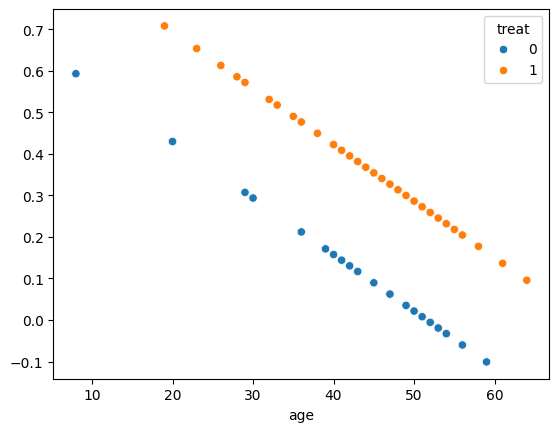

In [10]:
# Predicted survival probabilities from the model
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

# Scatterplot of predicted survival probabilities by age, hued by treatment group


In part 3, I extended the regression model by including age and the interaction term transplant \times age. The inclusion of age adjusts for the fact that older patients are generally less likely to survive the more extensive surgeries, for example, heart transplants. 
After adding these predictors, the intercept and the coefficient for the treatment group was adjusted. The intercept now reflects the baseline survival probability for the control group at the reference age. The treatment coefficient, adjusted for age, showed how the likelihood of survival changes for individuals receiving a transplant, keeping a check for their age. Including the interaction term allowed the model to highlight how the effect of receiving a transplant varies across different ages, especially for older patients.

Regression Coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

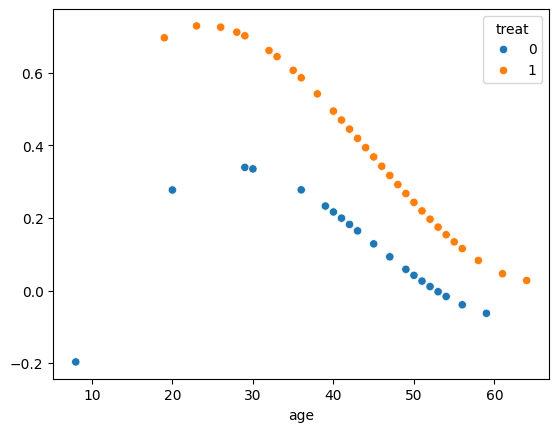

In [12]:
# Part 4: Non-linear age effects and interactions
# Create higher-order terms for age and interactions with treatment

from sklearn.linear_model import LinearRegression
df['treatXage'] = df['treat']*df['age']
df['age_sq'] = df['age']**2
df['treatXage_sq'] = df['treat']*df['age_sq']
df['age_cu'] = df['age']**3
df['treatXage_cu'] = df['treat']*df['age_cu']

# Design matrix with intercept, treatment, age, and non-linear age terms
y = df['y'] # Outcome variable
X = df.loc[:,['intercept', 'treat', 'age', 
              'treatXage',  
              'age_sq', 'age_cu']]

# Fit the linear regression model
reg = LinearRegression(fit_intercept=False).fit(X,y)
print('Regression Coefficients: ', reg.coef_)
# Predicted survival probabilities
y_hat = reg.predict(X)

# predicted survival probabilities by age and treatment group
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

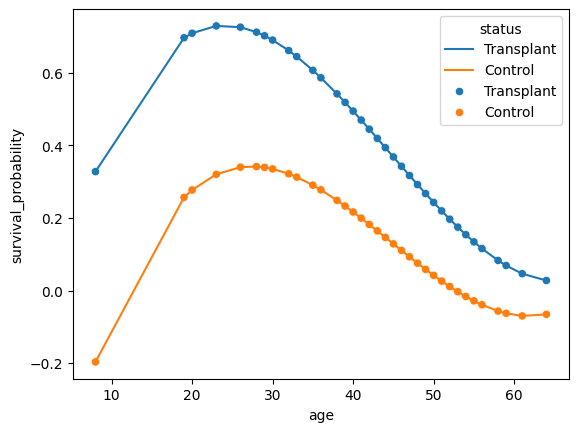

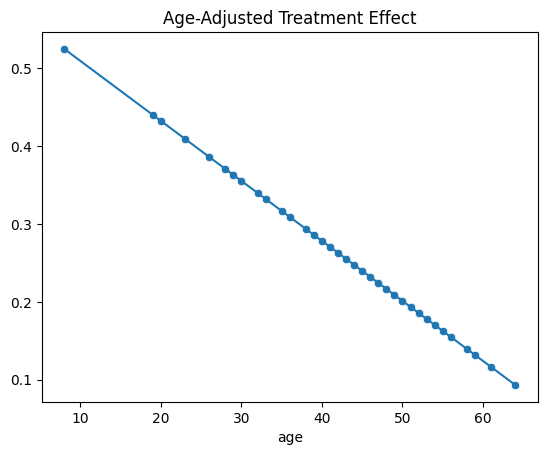

In [13]:
# Predicted survival probabilities for all treated and all untreated individuals
X_all_transplant = X
X_all_transplant['treat'] = 1 # all treated 
X_all_transplant['treatXage'] = X['age']
y_hat_transplant = reg.predict(X_all_transplant)

X_no_transplant = X
X_no_transplant['treat'] = 0 # all untreated
X_no_transplant['treatXage'] = 0
y_hat_control = reg.predict(X_no_transplant)

# Create dataframes for plotting predicted survival probabilities
gdf_treat = pd.DataFrame({'survival_probability':y_hat_transplant, 'age':X['age'], 'status':'Transplant'})
gdf_control = pd.DataFrame({'survival_probability':y_hat_control, 'age':X['age'], 'status':'Control'})
gdf = pd.concat([gdf_treat,gdf_control],axis=0)

# Line and scatter plots for predicted survival probabilities by age
sns.lineplot(data=gdf,x='age',y='survival_probability',hue = 'status')
sns.scatterplot(data=gdf,x='age',y='survival_probability',hue = 'status')
plt.show()

# Part 4: Age-adjusted treatment effect
age_adjusted_treatment_effect = y_hat_transplant - y_hat_control

# Plot age-adjusted treatment effect
sns.lineplot(x=X['age'],y=age_adjusted_treatment_effect).set_title('Age-Adjusted Treatment Effect')
sns.scatterplot(x=X['age'],y=age_adjusted_treatment_effect)
plt.show()

In part 4, I built a more flexible model by incorporating non-linear terms for age, like squared and cubic terms, and how they interact with the treatment variable. This model allowed for more complex relationships between age, treatment, and survival. I plotted the predicted survival probabilities by age for both the treatment and control groups. 
The visualization revealed that younger patients generally have higher predicted survival probabilities, but the benefit of receiving a transplant decreases with age. The plots also highlights non-linear trends, showing that survival probabilities do not change at the same rate as age.

Part 5:
Considering the major concerns of using predictive models for selecting organ transplant recipients, a primary concern is the potential for bias in the model, which could result from confounding variables or inequities in the data. For example, older patients or patients from underrepresented groups might be unfairly disadvantaged due to bias within the model. Such biases may stem from historical disparities in access to healthcare, variations in the quality of care received, or underrepresentation of certain groups in the data used to train the model. If these biases are not identified and mitigated, they could be built on existing inequalities in organ transplant allocation.

Further, there is a risk of over-reliance on a scoring algorithm without considering individual clinical judgment. Algorithms cannot fully capture the complexities of individual cases or account for complex clinical factors that physicians might rely on during decision-making. For example, a model might prioritize survival probabilities without considering specific medical contraindications for transplantation. Over-reliance on such models could lead to strict decision-making processes that neglect patient-specific information.

To address these concerns, the deployment of predictive models must ensure transparency, fairness, and regular monitoring. Transparency involves making the model’s structure, assumptions, and decision-making criteria clear to both clinicians and patients. Fairness requires addressing and correcting biases in the training data, ensuring equitable outcomes across different demographics. Regular monitoring helps identify potential unintended consequences and provides opportunities for model improvement over time. Ultimately, predictive models should assist human decision-making rather than replace it entirely, supporting clinicians while allowing space for human judgment and empathy.